# $B_s \rightarrow KK\mu\mu$ Data Documentation

## Preamble

This investigation has been detailed in 2 parts:
1. Background Reduction and Decay Reconstruction (this notebook)
2. Machine Learning and Branching Fraction



This notebook is entirely independent and can be run in its entirety by clicking the "Run all" button above. If you want to perform the reconstruction on the MC, just "uncomment" the relative cells below. The reconstruction will work all right, but clearly all of the discussion of the notebook assumes that your are looking at actual data

# Colab Notebook Setup

## Data

In [1]:
import os
import zipfile
import pandas as pd
import logging
import sys
from pathlib import Path
from typing import List
import numpy as np
import pandas as pd
import uproot
import uproot3
import matplotlib.pyplot as plt

/home/hep/kj3417/anaconda2/envs/py3/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/hep/kj3417/anaconda2/envs/py3/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


### Loading from ROOT files

The data can also be loaded by calling the following `load_data` function. 

This requires the `uproot` package which can be installed with `pip install uproot`.

In [2]:
#!pip install uproot

In [3]:
import logging
import time
from contextlib import contextmanager

logger = logging.getLogger("Timer")


@contextmanager
def timer(process: str, print_starting: bool = False):
    start_time = time.time()
    if print_starting:
        logger.info(f"{process} starting...")
    try:
        yield
    finally:
        logger.info(f"{process} took {time.time() - start_time:.3f}s")


# import logging
import sys
from pathlib import Path
from typing import List

import numpy as np
import pandas as pd
import uproot


logger = logging.getLogger('data_loader')

parent_folder = Path("/home/hep/kj3417/Bs2KKmumu/")
# # Change the above to be the Path to the folder containing .root files.


def load_data(df_name: str = 'Bs_data') -> pd.DataFrame:
 """
 Load data sets with the specified column names
 :param df_name: name of df to use (Lb_data, B_MC or Lb_MC)
 :return:
 """
 file_names_dict = {
      'Bs_data': ['Bs2KKmumu_2018_MagUp.root', 'Bs2KKmumu_2018_MagDown.root','Bs2KKmumu_2017_MagUp.root', 'Bs2KKmumu_2017_MagDown.root']
#          'Bs_data': ['Bs2KKmumu_2018_MagUp_SL_line.root', 'Bs2KKmumu_2018_MagDown_SL_line.root'],
 }

 if df_name not in file_names_dict:
     raise ValueError(f'df_name must be one of: {known_names}, not {df_name}')

 with timer("Loading data", print_starting=True):
     columns = add_branches(df_name)
     columns = set(columns)
     file_names = file_names_dict[df_name]
     events_frame = pd.DataFrame()
     for f in file_names:
         file = uproot.open(str(parent_folder / f))
         # events = file['DecayTree'] if 'B2' not in f else file['LbTuple/DecayTree']
         events = file['DecayTree']
         events_frame = pd.concat([events_frame, events.pandas.df(columns)], axis=0, ignore_index=True)
     logger.info(f"DataFrame memory used: {sys.getsizeof(events_frame):,} bytes.")
 return events_frame


def add_branches(df_name: str = 'Bs_data') -> List[str]:
 """
 Returns branches needed for analysis
 :param df_name: name of data frame which needs branch loading
 :return:
 """

 #Bs=['Bs_M','Bs_P','Bs_PT','Bs_pmu_ISOLATION_BDT1','Bs_pmu_ISOLATION_BDT2','Bs_pmu_ISOLATION_BDT3','Bs_pmu_ISOLATION_BDT4','Bs_DIRA_OWNPV','Bs_IP_OWNPV','Bs_IPCHI2_OWNPV','Bs_FDCHI2_OWNPV','Bs_OWNPV_X', 'Bs_OWNPV_Y', 'Bs_OWNPV_Z','Bs_OWNPV_NDOF','Bs_ENDVERTEX_CHI2','Bs_ENDVERTEX_NDOF','Bs_ENDVERTEX_X', 'Bs_ENDVERTEX_Y', 'Bs_ENDVERTEX_Z']

 Bs=['Bs_M','Bs_P','Bs_PT', 'Bs_pmu_ISOLATION_BDT1','Bs_DIRA_OWNPV','Bs_IP_OWNPV','Bs_IPCHI2_OWNPV','Bs_FDCHI2_OWNPV','Bs_OWNPV_X', 'Bs_OWNPV_Y', 'Bs_OWNPV_Z','Bs_OWNPV_NDOF','Bs_ENDVERTEX_CHI2','Bs_ENDVERTEX_NDOF','Bs_ENDVERTEX_X', 'Bs_ENDVERTEX_Y', 'Bs_ENDVERTEX_Z',
     'Bs_Hlt2TopoMu2BodyDecision_TOS','Bs_Hlt2TopoMu3BodyDecision_TOS', 'Bs_Hlt2TopoMu4BodyDecision_TOS','Bs_Hlt2DiMuonDecision_TOS','Bs_Hlt2SingleMuonDecision_TOS','Bs_Hlt2Topo2BodyDecision_TOS',
     'Bs_Hlt2Topo3BodyDecision_TOS', 'Bs_Hlt2Topo4BodyDecision_TOS', 'Bs_Hlt1TrackMVADecision_TOS', 'Bs_Hlt1TrackMuonDecision_TOS', 'Bs_L0MuonDecision_TOS', 'Bs_L0DiMuonDecision_TOS','eventNumber','runNumber']
 jpsi=['jpsi_M','jpsi_P','jpsi_PT']
 phi=['phi_M','phi_P','phi_PX','phi_PY','phi_PZ','phi_PT','phi_ENDVERTEX_X', 'phi_ENDVERTEX_Y', 'phi_ENDVERTEX_Z','phi_ENDVERTEX_CHI2','phi_ORIVX_CHI2']

 mu_plus = ['mu_plus_M','mu_plus_PE', 'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ', 'mu_plus_P', 'mu_plus_PT', 'mu_plus_isMuon', 'mu_plus_ProbNNe', 'mu_plus_ProbNNk', 'mu_plus_ProbNNp', 'mu_plus_ProbNNpi', 'mu_plus_ProbNNmu',
            'mu_plus_ProbNNd', 'mu_plus_ProbNNghost','mu_plus_PIDmu','mu_plus_PIDK','mu_plus_IPCHI2_OWNPV','mu_plus_MINIPCHI2','mu_plus_AtVtx_PX','mu_plus_AtVtx_PY','mu_plus_AtVtx_PZ','mu_plus_REFPX', 'mu_plus_REFPY', 'mu_plus_REFPZ','mu_plus_TRACK_CloneDist','mu_plus_TRACK_GhostProb']
 mu_minus = ['mu_minus_M','mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ', 'mu_minus_P', 'mu_minus_PT', 'mu_minus_isMuon', 'mu_minus_ProbNNe', 'mu_minus_ProbNNk', 'mu_minus_ProbNNp', 'mu_minus_ProbNNpi', 'mu_minus_ProbNNmu',
             'mu_minus_ProbNNd', 'mu_minus_ProbNNghost','mu_minus_PIDmu','mu_minus_PIDK','mu_minus_IPCHI2_OWNPV','mu_minus_MINIPCHI2','mu_minus_AtVtx_PX','mu_minus_AtVtx_PY','mu_minus_AtVtx_PZ','mu_minus_REFPX', 'mu_minus_REFPY', 'mu_minus_REFPZ','mu_minus_TRACK_CloneDist','mu_minus_TRACK_GhostProb']
 K_plus = ['K_plus_M','K_plus_PE', 'K_plus_PX', 'K_plus_PY', 'K_plus_PZ', 'K_plus_P', 'K_plus_PT', 'K_plus_isMuon', 'K_plus_ProbNNe', 'K_plus_ProbNNk', 'K_plus_ProbNNp', 'K_plus_ProbNNpi', 'K_plus_ProbNNmu',
            'K_plus_ProbNNd', 'K_plus_ProbNNghost','K_plus_PIDK','K_plus_PIDmu','K_plus_PIDd','K_plus_PIDp','K_plus_IPCHI2_OWNPV','K_plus_MINIPCHI2','K_plus_TRACK_CloneDist','K_plus_TRACK_GhostProb']
 K_minus = ['K_minus_M','K_minus_PE', 'K_minus_PX', 'K_minus_PY', 'K_minus_PZ', 'K_minus_P', 'K_minus_PT', 'K_minus_isMuon', 'K_minus_ProbNNe', 'K_minus_ProbNNk', 'K_minus_ProbNNp', 'K_minus_ProbNNpi', 'K_minus_ProbNNmu',
             'K_minus_ProbNNd', 'K_minus_ProbNNghost','K_minus_PIDK','K_minus_PIDmu','K_minus_PIDd','K_minus_PIDp','K_minus_IPCHI2_OWNPV','K_minus_MINIPCHI2','K_minus_TRACK_CloneDist','K_minus_TRACK_GhostProb']

 return Bs+phi+jpsi+mu_plus+mu_minus+K_plus+K_minus

Bs_data=load_data()


# Make this cell "CODE" to load MC phi3tautau 

import logging
import sys
from pathlib import Path
from typing import List

import numpy as np
import pandas as pd
import uproot


logger = logging.getLogger('data_loader')

parent_folder = Path("/home/hep/kj3417/Bs2KKmumu/")
# # Change the above to be the Path to the folder containing .root files.


def load_data(df_name: str = 'Bs_data') -> pd.DataFrame:
     """
     Load data sets with the specified column names
     :param df_name: name of df to use (Lb_data, B_MC or Lb_MC)
     :return:
     """
     file_names_dict = {
#          'Bs_data': ['Bs2KKmumu_2mil_MCtruth_wTrig.root']
          'Bs_data': ['Bs2KKmumu_MC_MD_part3_2mil_PID.root','Bs2KKmumu_MC_MD_SL_take2.root']
#          'Bs_data': ['Bs2KKmumu_2018_MagUp_SL_line.root', 'Bs2KKmumu_2018_MagDown_SL_line.root'],
     }

     if df_name not in file_names_dict:
         raise ValueError(f'df_name must be one of: {known_names}, not {df_name}')

     with timer("Loading data", print_starting=True):
         columns = add_branches(df_name)
         columns = set(columns)
         file_names = file_names_dict[df_name]
         events_frame = pd.DataFrame()
         i=0
         for f in file_names:
             file = uproot.open(str(parent_folder / f))
             if i==0:
                 events = file['DecayTree'] if 'B2' not in f else file['Bs2KKmumu/DecayTree']
             #events = file['Bs2KKmumu/DecayTree']
                 events_frame = pd.concat([events_frame, events.pandas.df(columns)], axis=0, ignore_index=True)
                 i=1
             else:
                 #events = file['Bs2KKmumu/DecayTree'] if 'B2' not in f else file['Bs2KKmumu/DecayTree']
                 events = file['Bs2KKmumu/DecayTree']
                 events_frame = pd.concat([events_frame, events.pandas.df(columns)], axis=0, ignore_index=True)
         logger.info(f"DataFrame memory used: {sys.getsizeof(events_frame):,} bytes.")
     return events_frame


def add_branches(df_name: str = 'Bs_data') -> List[str]:
     """
     Returns branches needed for analysis
     :param df_name: name of data frame which needs branch loading
     :return:
     """

     #Bs=['Bs_M','Bs_P','Bs_PT','Bs_pmu_ISOLATION_BDT1','Bs_pmu_ISOLATION_BDT2','Bs_pmu_ISOLATION_BDT3','Bs_pmu_ISOLATION_BDT4','Bs_DIRA_OWNPV','Bs_IP_OWNPV','Bs_IPCHI2_OWNPV','Bs_FDCHI2_OWNPV','Bs_OWNPV_X', 'Bs_OWNPV_Y', 'Bs_OWNPV_Z','Bs_OWNPV_NDOF','Bs_ENDVERTEX_CHI2','Bs_ENDVERTEX_NDOF','Bs_ENDVERTEX_X', 'Bs_ENDVERTEX_Y', 'Bs_ENDVERTEX_Z']
     
     Bs=['Bs_M','Bs_P','Bs_PT','Bs_pmu_ISOLATION_BDT1','Bs_DIRA_OWNPV','Bs_IP_OWNPV','Bs_IPCHI2_OWNPV','Bs_FDCHI2_OWNPV','Bs_FD_OWNPV','Bs_OWNPV_X', 'Bs_OWNPV_Y', 'Bs_OWNPV_Z','Bs_OWNPV_NDOF','Bs_ENDVERTEX_CHI2','Bs_ENDVERTEX_NDOF','Bs_ENDVERTEX_X', 'Bs_ENDVERTEX_Y', 'Bs_ENDVERTEX_Z','Bs_TRUEENDVERTEX_X', 'Bs_TRUEENDVERTEX_Y', 'Bs_TRUEENDVERTEX_Z','Bs_OWNPV_CHI2','Bs_OWNPV_NDOF','Bs_Hlt2TopoMu2BodyDecision_TOS','Bs_Hlt2TopoMu3BodyDecision_TOS',
         'Bs_Hlt2TopoMu4BodyDecision_TOS','Bs_Hlt2DiMuonDecision_TOS','Bs_Hlt2SingleMuonDecision_TOS','Bs_Hlt2Topo2BodyDecision_TOS',
         'Bs_Hlt2Topo3BodyDecision_TOS', 'Bs_Hlt2Topo4BodyDecision_TOS', 'Bs_Hlt1TrackMVADecision_TOS', 'Bs_Hlt1TrackMuonDecision_TOS', 'Bs_L0MuonDecision_TOS', 'Bs_L0DiMuonDecision_TOS', 'eventNumber','runNumber']
     jpsi=['jpsi_M','jpsi_P','jpsi_PT']
     phi=['phi_M','phi_P','phi_PX','phi_PY','phi_PZ','phi_PT','phi_ENDVERTEX_X', 'phi_ENDVERTEX_Y', 'phi_ENDVERTEX_Z','phi_ENDVERTEX_CHI2','phi_TRUEID','phi_MC_MOTHER_ID','phi_OWNPV_CHI2','phi_OWNPV_NDOF','phi_MINIPCHI2','phi_DIRA_ORIVX','phi_ORIVX_CHI2']

     mu_plus = ['mu_plus_M','mu_plus_PE', 'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ', 'mu_plus_P', 'mu_plus_PT', 'mu_plus_isMuon', 'mu_plus_ProbNNe', 'mu_plus_ProbNNk', 'mu_plus_ProbNNp', 'mu_plus_ProbNNpi', 'mu_plus_ProbNNmu',
                'mu_plus_ProbNNd', 'mu_plus_ProbNNghost','mu_plus_PIDmu','mu_minus_PIDp','mu_plus_PIDK','mu_plus_IPCHI2_OWNPV','mu_plus_MINIPCHI2','mu_plus_AtVtx_PX','mu_plus_AtVtx_PY','mu_plus_AtVtx_PZ','mu_plus_REFPX', 'mu_plus_REFPY', 'mu_plus_REFPZ','mu_plus_TRUEID','mu_plus_MC_MOTHER_ID','mu_plus_MC_GD_MOTHER_ID','mu_plus_MC_GD_MOTHER_KEY','mu_plus_TRUEORIGINVERTEX_X','mu_plus_TRUEORIGINVERTEX_Y','mu_plus_TRUEORIGINVERTEX_Z','mu_plus_TRACK_CloneDist','mu_plus_TRACK_GhostProb']
     mu_minus = ['mu_minus_M','mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ', 'mu_minus_P', 'mu_minus_PT', 'mu_minus_isMuon', 'mu_minus_ProbNNe', 'mu_minus_ProbNNk', 'mu_minus_ProbNNp', 'mu_minus_ProbNNpi', 'mu_minus_ProbNNmu',
                 'mu_minus_ProbNNd', 'mu_minus_ProbNNghost','mu_minus_PIDmu','mu_plus_PIDp','mu_minus_PIDK','mu_minus_IPCHI2_OWNPV','mu_minus_MINIPCHI2','mu_minus_AtVtx_PX','mu_minus_AtVtx_PY','mu_minus_AtVtx_PZ','mu_minus_REFPX', 'mu_minus_REFPY', 'mu_minus_REFPZ','mu_minus_TRUEID','mu_minus_MC_MOTHER_ID','mu_minus_MC_GD_MOTHER_ID','mu_minus_MC_GD_MOTHER_KEY','mu_minus_TRUEORIGINVERTEX_X','mu_minus_TRUEORIGINVERTEX_Y','mu_minus_TRUEORIGINVERTEX_Z','mu_minus_TRACK_CloneDist','mu_minus_TRACK_GhostProb']
     K_plus = ['K_plus_M','K_plus_PE', 'K_plus_PX', 'K_plus_PY', 'K_plus_PZ', 'K_plus_P', 'K_plus_PT', 'K_plus_isMuon', 'K_plus_ProbNNe', 'K_plus_ProbNNk', 'K_plus_ProbNNp', 'K_plus_ProbNNpi', 'K_plus_ProbNNmu',
                'K_plus_ProbNNd', 'K_plus_ProbNNghost','K_plus_PIDK','K_plus_PIDmu','K_plus_PIDd','K_plus_PIDp','K_plus_IPCHI2_OWNPV','K_plus_MINIPCHI2','K_plus_TRUEID','K_plus_MC_MOTHER_ID','K_plus_MC_GD_MOTHER_ID','K_plus_TRACK_CloneDist','K_plus_TRACK_GhostProb']
     K_minus = ['K_minus_M','K_minus_PE', 'K_minus_PX', 'K_minus_PY', 'K_minus_PZ', 'K_minus_P', 'K_minus_PT', 'K_minus_isMuon', 'K_minus_ProbNNe', 'K_minus_ProbNNk', 'K_minus_ProbNNp', 'K_minus_ProbNNpi', 'K_minus_ProbNNmu',
                 'K_minus_ProbNNd', 'K_minus_ProbNNghost','K_minus_PIDK','K_minus_PIDmu','K_minus_PIDd','K_minus_PIDp','K_minus_IPCHI2_OWNPV','K_minus_MINIPCHI2','K_minus_TRUEID','K_minus_MC_MOTHER_ID','K_minus_MC_GD_MOTHER_ID','K_minus_TRACK_CloneDist','K_minus_TRACK_GhostProb']

     return Bs+phi+jpsi+mu_plus+mu_minus+K_plus+K_minus

Bs_data=load_data()

import logging
import sys
from pathlib import Path
from typing import List

import numpy as np
import pandas as pd
import uproot
import uproot3


logger = logging.getLogger('data_loader')

parent_folder = Path("~/code/data/")
# # Change the above to be the Path to the folder containing .root files.


def load_data(df_name: str = 'Bs_data') -> pd.DataFrame:
    """
    Load data sets with the specified column names
    :param df_name: name of df to use (Lb_data, B_MC or Lb_MC)
    :return:
    """
    file_names_dict = {
      'Bs_data': ['bender_mc_PID.root']
    #          'Bs_data': ['Bs2KKmumu_2018_MagUp_SL_line.root', 'Bs2KKmumu_2018_MagDown_SL_line.root'],
    }

    if df_name not in file_names_dict:
        raise ValueError(f'df_name must be one of: {known_names}, not {df_name}')

    with timer("Loading data", print_starting=True):
        columns = add_branches(df_name)
        columns = set(columns)
        file_names = file_names_dict[df_name]
        events_frame = pd.DataFrame()
        for f in file_names:
            file = uproot3.open(str(parent_folder / f))
            # events = file['DecayTree'] if 'B2' not in f else file['LbTuple/DecayTree']
            events = file['DecayTree']
            events_frame = pd.concat([events_frame, events.pandas.df(columns)], flatten=False, axis=0, ignore_index=True)
        logger.info(f"DataFrame memory used: {sys.getsizeof(events_frame):,} bytes.")
    return events_frame


def add_branches(df_name: str = 'Bs_data') -> List[str]:
    """
    Returns branches needed for analysis
    :param df_name: name of data frame which needs branch loading
    :return:
    """
    """
    Bs=['Bs_M','Bs_P','Bs_PT','Bs_pmu_ISOLATION_BDT1','Bs_DIRA_OWNPV','Bs_IP_OWNPV','Bs_IPCHI2_OWNPV','Bs_FDCHI2_OWNPV','Bs_OWNPV_X', 'Bs_OWNPV_Y', 'Bs_OWNPV_Z','Bs_OWNPV_NDOF','Bs_ENDVERTEX_CHI2','Bs_ENDVERTEX_NDOF','Bs_ENDVERTEX_X', 'Bs_ENDVERTEX_Y', 'Bs_ENDVERTEX_Z', 'Bs_Hlt2TopoMu2BodyDecision_TOS','Bs_Hlt2TopoMu3BodyDecision_TOS',
     'Bs_Hlt2TopoMu4BodyDecision_TOS','Bs_Hlt2DiMuonDecision_TOS','Bs_Hlt2SingleMuonDecision_TOS','Bs_Hlt2Topo2BodyDecision_TOS',
     'Bs_Hlt2Topo3BodyDecision_TOS', 'Bs_Hlt2Topo4BodyDecision_TOS', 'Bs_Hlt1TrackMVADecision_TOS', 'Bs_Hlt1TrackMuonDecision_TOS', 'Bs_L0MuonDecision_TOS', 'Bs_L0DiMuonDecision_TOS', 'eventNumber','runNumber']
    jpsi=['jpsi_M','jpsi_P','jpsi_PT']
    phi=['phi_M','phi_P','phi_PX','phi_PY','phi_PZ','phi_PT','phi_ENDVERTEX_X', 'phi_ENDVERTEX_Y', 'phi_ENDVERTEX_Z','phi_ENDVERTEX_CHI2','phi_ORIVX_CHI2','phi_TRUEID']

    mu_plus = ['mu_plus_M','mu_plus_PE', 'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ', 'mu_plus_P', 'mu_plus_PT', 'mu_plus_isMuon', 'mu_plus_ProbNNe', 'mu_plus_ProbNNk', 'mu_plus_ProbNNp', 'mu_plus_ProbNNpi', 'mu_plus_ProbNNmu',
            'mu_plus_ProbNNd', 'mu_plus_ProbNNghost','mu_plus_PIDmu','mu_plus_PIDK','mu_plus_PIDd','mu_plus_PIDp','mu_plus_IPCHI2_OWNPV','mu_plus_MINIPCHI2','mu_plus_AtVtx_PX','mu_plus_AtVtx_PY','mu_plus_AtVtx_PZ','mu_plus_REFPX', 'mu_plus_REFPY', 'mu_plus_REFPZ','mu_plus_IPCHI2_OWNPV','mu_plus_TRUEID','mu_plus_MC_MOTHER_ID','mu_plus_MC_GD_MOTHER_ID','mu_plus_MC_GD_MOTHER_KEY','mu_plus_TRACK_CloneDist','mu_plus_TRACK_GhostProb']
    mu_minus = ['mu_minus_M','mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ', 'mu_minus_P', 'mu_minus_PT', 'mu_minus_isMuon', 'mu_minus_ProbNNe', 'mu_minus_ProbNNk', 'mu_minus_ProbNNp', 'mu_minus_ProbNNpi', 'mu_minus_ProbNNmu',
             'mu_minus_ProbNNd', 'mu_minus_ProbNNghost','mu_minus_PIDmu','mu_minus_PIDK','mu_minus_PIDd','mu_minus_PIDp','mu_minus_IPCHI2_OWNPV','mu_minus_MINIPCHI2','mu_minus_AtVtx_PX','mu_minus_AtVtx_PY','mu_minus_AtVtx_PZ','mu_minus_REFPX', 'mu_minus_REFPY', 'mu_minus_REFPZ','mu_minus_IPCHI2_OWNPV','mu_minus_TRUEID','mu_minus_MC_MOTHER_ID','mu_minus_MC_GD_MOTHER_ID','mu_minus_MC_GD_MOTHER_KEY','mu_minus_TRACK_CloneDist','mu_minus_TRACK_GhostProb']
    K_plus = ['K_plus_M','K_plus_PE', 'K_plus_PX', 'K_plus_PY', 'K_plus_PZ', 'K_plus_P', 'K_plus_PT', 'K_plus_isMuon', 'K_plus_ProbNNe', 'K_plus_ProbNNk', 'K_plus_ProbNNp', 'K_plus_ProbNNpi', 'K_plus_ProbNNmu',
            'K_plus_ProbNNd', 'K_plus_ProbNNghost','K_plus_PIDK','K_plus_PIDmu','K_plus_PIDd','K_plus_PIDp','K_plus_IPCHI2_OWNPV','K_plus_MINIPCHI2','K_plus_TRUEID','K_plus_MC_MOTHER_ID','K_plus_MC_GD_MOTHER_ID','K_plus_MC_GD_MOTHER_KEY','K_plus_TRACK_CloneDist','K_plus_TRACK_GhostProb']
    K_minus = ['K_minus_M','K_minus_PE', 'K_minus_PX', 'K_minus_PY', 'K_minus_PZ', 'K_minus_P', 'K_minus_PT', 'K_minus_isMuon', 'K_minus_ProbNNe', 'K_minus_ProbNNk', 'K_minus_ProbNNp', 'K_minus_ProbNNpi', 'K_minus_ProbNNmu',
             'K_minus_ProbNNd', 'K_minus_ProbNNghost','K_minus_PIDK','K_minus_PIDmu','K_minus_PIDd','K_minus_PIDp','K_minus_IPCHI2_OWNPV','K_minus_MINIPCHI2','K_minus_TRUEID','K_minus_MC_MOTHER_ID','K_minus_MC_GD_MOTHER_ID','K_minus_MC_GD_MOTHER_KEY','K_minus_TRACK_CloneDist','K_minus_TRACK_GhostProb']
    """

    Bs=['Bs_M','Bs_P','Bs_PT','Bs_MINIPCHI2','Bs_FDCHI2','Bs_TRUE_OVX', 'Bs_TRUE_OVY', 'Bs_TRUE_OVZ','Bs_VCHI2','Bs_VNDOF','Bs_VX', 'Bs_VY', 'Bs_VZ', 'Bs_Hlt2TopoMu2BodyDecision_TOS','Bs_Hlt2TopoMu3BodyDecision_TOS',
     'Bs_Hlt2TopoMu4BodyDecision_TOS','Bs_Hlt2DiMuonDecision_TOS','Bs_Hlt2SingleMuonDecision_TOS','Bs_Hlt2Topo2BodyDecision_TOS',
     'Bs_Hlt2Topo3BodyDecision_TOS', 'Bs_Hlt2Topo4BodyDecision_TOS', 'Bs_Hlt1TrackMVADecision_TOS', 'Bs_Hlt1TrackMuonDecision_TOS', 'Bs_L0MuonDecision_TOS', 'Bs_L0DiMuonDecision_TOS', 'eventNumber','runNumber']
    # jpsi=['jpsi_M','jpsi_P','jpsi_PT']
    phi=['phi3_M','phi3_P','phi3_PX','phi3_PY','phi3_PZ','phi3_PT','phi3_VX', 'phi3_VY', 'phi3_VZ','phi3_VCHI2','phi3_TRUE_ID']

    mu_plus = ['muplus_M','muplus_E', 'muplus_PX', 'muplus_PY', 'muplus_PZ', 'muplus_P', 'muplus_PT', 'muplus_IsMuon', 'muplus_ProbNNe', 'muplus_ProbNNk', 'muplus_ProbNNp', 'muplus_ProbNNpi', 'muplus_ProbNNmu',
            'muplus_ProbNNd', 'muplus_ProbNNghost','muplus_PIDmu_corr','muplus_MINIPCHI2','muplus_RefPoint_X', 'muplus_RefPoint_Y', 'muplus_RefPoint_Z','muplus_ID','muplus_ghostProb']
    mu_minus = ['muminus_M','muminus_E', 'muminus_PX', 'muminus_PY', 'muminus_PZ', 'muminus_P', 'muminus_PT', 'muminus_IsMuon', 'muminus_ProbNNe', 'muminus_ProbNNk', 'muminus_ProbNNp', 'muminus_ProbNNpi', 'muminus_ProbNNmu',
            'muminus_ProbNNd', 'muminus_ProbNNghost','muminus_PIDmu_corr','muminus_MINIPCHI2','muminus_RefPoint_X', 'muminus_RefPoint_Y', 'muminus_RefPoint_Z','muminus_ID','muminus_ghostProb']
   
    K_plus = ['Kplus_M','Kplus_E', 'Kplus_PX', 'Kplus_PY', 'Kplus_PZ', 'Kplus_P', 'Kplus_PT', 'Kplus_IsMuon', 'Kplus_ProbNNe', 'Kplus_ProbNNk', 'Kplus_ProbNNp', 'Kplus_ProbNNpi', 'Kplus_ProbNNmu',
            'Kplus_ProbNNd', 'Kplus_ProbNNghost','Kplus_PIDK_corr','Kplus_MINIPCHI2','Kplus_TRUE_ID','Kplus_ghostProb']
    
    K_minus = ['Kminus_M','Kminus_E', 'Kminus_PX', 'Kminus_PY', 'Kminus_PZ', 'Kminus_P', 'Kminus_PT', 'Kminus_IsMuon', 'Kminus_ProbNNe', 'Kminus_ProbNNk', 'Kminus_ProbNNp', 'Kminus_ProbNNpi', 'Kminus_ProbNNmu',
            'Kminus_ProbNNd', 'Kminus_ProbNNghost','Kminus_PIDK_corr','Kminus_MINIPCHI2','Kminus_TRUE_ID','Kminus_ghostProb']
    
    geom = ['DOCA_mu_plus','DOCA_mu_minus','DOCA_chi2_mu_plus','DOCA_chi2_mu_minus','IP_mu_plus','IP_mu_minus','IP_chi2_mu_plus','IP_chi2_mu_minus'
            ,'FD_tau_plus','FD_tau_minus','FD_tau_plus','FD_chi2_tau_plus','FD_chi2_tau_minus', 'VFIT_plus_x', 'VFIT_plus_y', 'VFIT_plus_z', 'VFIT_minus_x', 'VFIT_minus_y', 'VFIT_minus_z']
    
    return Bs+phi+mu_plus+mu_minus+K_plus+K_minus+geom

Bs_data=load_data()

In [4]:
def root_to_df2(fname,drop_na = False):
    file = uproot3.open('{}'.format(fname))
    #decay_tuple = file['DecayTree']
    decay_tuple = file['DecayTree/DecayTree']
    col_names = decay_tuple.keys()
    columns = [col.decode("utf-8") for col in col_names]
    # df = pd.DataFrame(decay_tuple.arrays(columns, flatten=None))
    # df.columns = columns
    #df = decay_tuple.pandas.df(columns, flatten=True)
    Bs = decay_tuple.pandas.df("Bs*", flatten=True)
    phi = decay_tuple.pandas.df("phi3*", flatten=True)
    dist = decay_tuple.pandas.df("DOCA*", flatten=True)
    ip = decay_tuple.pandas.df("IP*", flatten=True)
    fd = decay_tuple.pandas.df("FD*", flatten=True)
    vfit = decay_tuple.pandas.df("VFIT*", flatten=True)
    muminus = decay_tuple.pandas.df("muminus*", flatten=True)
    muplus = decay_tuple.pandas.df("muplus*", flatten=True)
    tauminus = decay_tuple.pandas.df("tauminus*", flatten=True)
    tauplus = decay_tuple.pandas.df("tauplus*", flatten=True)
    Kminus = decay_tuple.pandas.df("Kminus*", flatten=True)
    Kplus = decay_tuple.pandas.df("Kplus*", flatten=True)
    events = decay_tuple.pandas.df("event*", flatten=True)
    # dfs = [Bs, phi, dist, mu, Kplus, Kminus]
    df = Bs.join(phi, how="outer").join(dist, how="outer").join(ip, how="outer").join(vfit, how="outer").join(fd, how="outer").join(muplus, how="outer").join(muminus, how="outer").join(tauplus, how="outer").join(tauminus, how="outer").join(Kminus, how="outer").join(Kplus, how="outer").join(events, how="outer")
    if drop_na:
        df.dropna(inplace=True)
    np.savetxt('columns/{}_columns.txt'.format(fname.split('.')[0].split('/')[-1]),df.columns.to_numpy(),fmt='%s')
    return df

Bs_data_1=root_to_df2('../data/bender_data_2018_part1.root', drop_na=True)
Bs_data_2=root_to_df2('../data/bender_data_2018_part2.root', drop_na=True)
Bs_data = pd.concat([Bs_data_1,Bs_data_2])

Add J_psi mass:

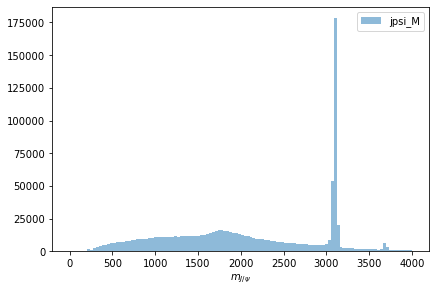

In [5]:
Bs_data['muplus_E'] = np.sqrt(Bs_data['muplus_M']**2 + np.linalg.norm(Bs_data[['muplus_PX','muplus_PY','muplus_PZ']].to_numpy(), axis = 1)**2)
Bs_data['muminus_E'] = np.sqrt(Bs_data['muminus_M']**2 + np.linalg.norm(Bs_data[['muminus_PX','muminus_PY','muminus_PZ']].to_numpy(), axis = 1)**2)

mu_plus_4mom = Bs_data[['muplus_E','muplus_PX','muplus_PY','muplus_PZ']].to_numpy()
mu_minus_4mom = Bs_data[['muminus_E','muminus_PX','muminus_PY','muminus_PZ']].to_numpy()

def metric_norm(x):
    e = x[:,0]
    p = x[:,1:4]
    return e**2 - np.linalg.norm(p,axis = 1)**2

Bs_data['jpsi_M'] = np.sqrt(metric_norm(mu_plus_4mom + mu_minus_4mom))
plt.hist(Bs_data['jpsi_M'] , bins='auto', range=(0, 4000), alpha = 0.5, label = "jpsi_M")
plt.xlabel('$m_{J / \psi}$')
plt.tight_layout(pad=0.5)
plt.legend()

plt.show()

## Plotting options

In [6]:
import matplotlib.pyplot as plt

plt.rcdefaults()

rcParams = {
    'xtick.major.size': 1.5,
    'xtick.major.pad': 1.5,
    'axes.labelpad': 2,
    'axes.grid': True,
}
for k, v in rcParams.items():
    print(f"Set {k} to {v} from {plt.rcParams[k]}")
    plt.rcParams[k] = v

Set xtick.major.size to 1.5 from 3.5
Set xtick.major.pad to 1.5 from 3.5
Set axes.labelpad to 2 from 4.0
Set axes.grid to True from False


In [7]:

"""
=============
plot settings
=============
"""

override = {
   'axes.labelsize':40,
   'font.size': 40,
   'legend.fontsize': 40,
   'legend.framealpha': 1,
   'legend.edgecolor': 'black',
   'grid.color': 'gainsboro',
   'grid.linewidth': 1.75,
   'xtick.labelsize': 40,
   'ytick.labelsize': 40,
   'figure.figsize': [13, 10],
   'lines.linewidth': 3,
   'font.family': 'DejaVu Sans',
   'mathtext.fontset': 'cm',
   'text.usetex': True ### attention! May raise errors if you have not set up python to use LaTex
   } 

overridesmall = {
   'axes.labelsize':28,
   'font.size': 28,
   'legend.fontsize': 32,
   'legend.framealpha': 1,
   'legend.edgecolor': 'black',
   'grid.color': 'gainsboro',
   'xtick.labelsize': 28,
   'ytick.labelsize': 28,   
   'figure.figsize': [11, 8.5],
   'lines.linewidth': 3,
   'font.sans-serif': 'Computer Modern Sans serif',
   'mathtext.fontset': 'cm'
   } 

colors=["indianred","dodgerblue","darkorange","forestgreen","hotpink",
        "cornflowerblue","darkgoldenrod","sienna","yellowgreen","tomato"]


Let's plot the $KK \mu \mu$ and $KK$ spectra before any analysis and cuts:

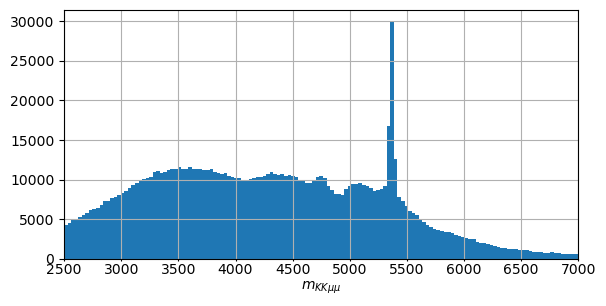

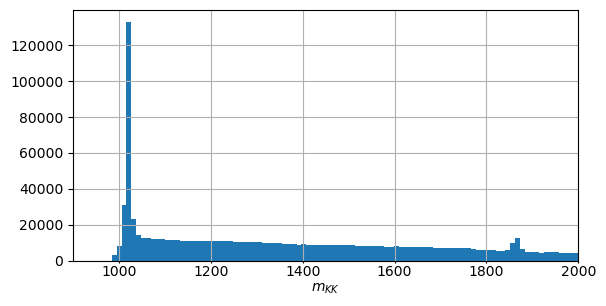

In [8]:
plt.figure(figsize=(6, 3))
Bs_mass_range = (2500, 7000)
plt.hist(Bs_data['Bs_M'], bins='auto', range=Bs_mass_range)

plt.xlabel('$m_{KK \mu \mu}$')
plt.xlim(Bs_mass_range)
#plt.legend()
plt.tight_layout(pad=0.5)

plt.show()

plt.figure(figsize=(6, 3))
Bs_mass_range = (900, 2000)
plt.hist(Bs_data['phi3_M'], bins='auto', range=Bs_mass_range)

plt.xlabel('$m_{KK}$')
plt.xlim(Bs_mass_range)
#plt.legend()
plt.tight_layout(pad=0.5)

plt.show()

Let's plot $KK \mu \mu$ and $KK$ spectra with $\phi_3$ selection and 

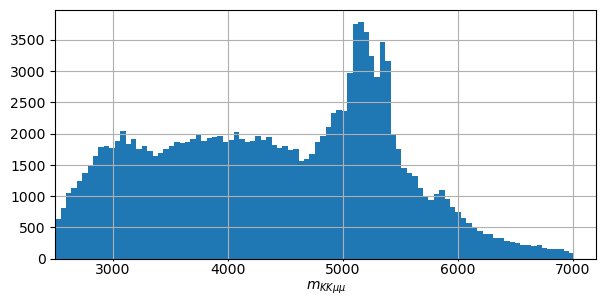

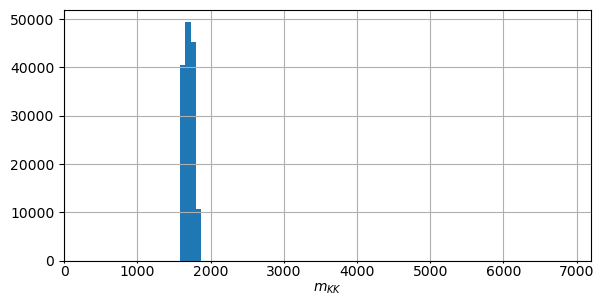

In [9]:
phi3mask=((Bs_data['phi3_M']>1600) & (Bs_data['phi3_M']<1820))

plt.figure(figsize=(6, 3))
Bs_mass_range = (2500, 7200)
plt.hist(Bs_data.loc[phi3mask]['Bs_M'], bins=100, range=Bs_mass_range)

plt.xlabel('$m_{KK \mu \mu}$')
plt.xlim(Bs_mass_range)
#plt.legend()
plt.tight_layout(pad=0.5)

plt.show()


plt.figure(figsize=(6, 3))
Bs_mass_range = (0, 7200)
plt.hist(Bs_data.loc[phi3mask]['phi3_M'], bins=100, range=Bs_mass_range)

plt.xlabel('$m_{KK}$')
plt.xlim(Bs_mass_range)
#plt.legend()
plt.tight_layout(pad=0.5)

plt.show()

## Cutting function

In [10]:
import logging
from typing import Callable

import pandas as pd

logger = logging.getLogger("CuttingMonitor")
logging.basicConfig(level=logging.INFO)

def apply_cuts(name: str, data_frame: pd.DataFrame, func: Callable[[pd.DataFrame], pd.DataFrame]):
    logger.info(f"Applying cuts: {name}")
    initial_length = len(data_frame)
    logger.info(f"\tInitial length: {initial_length}")

    data_frame = func(data_frame)

    length_after_cuts = len(data_frame)
    logger.info(f"\tLength after cut: {length_after_cuts} ({length_after_cuts / initial_length * 100:.3f}% kept)")
    return data_frame

## Utilities

In [11]:
import numpy as np
import pandas as pd
from typing import List, Optional

masses = {'mu': 105.658, 'tau': 1777, 'proton': 938.272, 'K': 493.677, 'pi': 139.57, 'D0': 1865,
          'J/psi': 3097, 'psi(2S)': 3686, 'rho0': 770, 'rho1450': 1450, 'kstar': 892,
          'Lc': 2286, 'Lb': 5620, 'B': 5279, 'phi': 1020, 'Bs': 5367,'f0':1500}


def get_mass(data_frame: pd.DataFrame, particles_associations: List[List[str]]) -> pd.DataFrame:
    """
    Obtains the mass of different associations of particles
    :param data_frame:
    :param particles_associations: list of lists made of ['particle_P', 'particle']
    :return:
    """
    energy_series = [
        (data_frame.loc[:, particle_P] ** 2 + masses[particle] ** 2) ** 0.5
        for particle_P, particle in particles_associations
    ]
    energy = pd.concat(energy_series, axis=1).sum(axis=1)
    
    particle_Ps = [i[0] for i in particles_associations]
    
    momentums = {}
    for coord in ['X', 'Y', 'Z']:
        particle_P_coords = [f'{particle_P}{coord}' for particle_P in particle_Ps]
        momentum_series = data_frame.loc[:, particle_P_coords].sum(axis=1)
        momentums[coord] = momentum_series
    sum_momenta = (pd.concat(momentums.values(), axis=1) ** 2).sum(axis=1)
    mass = (energy ** 2 - sum_momenta) ** 0.5
    return mass


In [12]:
def rename_func(name: str):
    """
    Used to rename DataFrame columns that end in 'X', 'Y', and 'Z' such that they can be used in arithmetic operations
    """
    return name[-1].lower()

Below a "rustic" counter of the events to not double count copies of the same event

In [13]:
def event_counter(data_frame):
    actual_events=[]
    counter=0
    event_number=data_frame['eventNumber'].to_numpy()
    run_number=data_frame['eventNumber'].to_numpy()
    for i in range(len(event_number)):
        if (event_number[i] in actual_events)==False:
            actual_events.append(event_number[i])
            counter+=1
    return counter


# Background Reduction


In [14]:
data_frame = Bs_data.copy()

In [15]:
triggering=(((data_frame["Bs_Hlt2TopoMu2BodyDecision_TOS"].astype(int) | data_frame["Bs_Hlt2TopoMu3BodyDecision_TOS"].astype(int) | data_frame["Bs_Hlt2TopoMu4BodyDecision_TOS"].astype(int) |
               data_frame["Bs_Hlt2DiMuonDecision_TOS"].astype(int) | data_frame["Bs_Hlt2SingleMuonDecision_TOS"].astype(int) | data_frame["Bs_Hlt2Topo2BodyDecision_TOS"].astype(int) | data_frame["Bs_Hlt2Topo3BodyDecision_TOS"].astype(int) | data_frame["Bs_Hlt2Topo4BodyDecision_TOS"].astype(int))>0) &
            ((data_frame["Bs_Hlt1TrackMVADecision_TOS"].astype(int) | data_frame["Bs_Hlt1TrackMuonDecision_TOS"].astype(int))>0) &
            ((data_frame["Bs_L0MuonDecision_TOS"].astype(int) | data_frame["Bs_L0DiMuonDecision_TOS"].astype(int))>0))

data_frame=data_frame.loc[triggering]

First of all, we need to deploy the triggering to the data

triggering=(((data_frame["Bs_Hlt2TopoMu2BodyDecision_TOS"] | data_frame["Bs_Hlt2TopoMu3BodyDecision_TOS"] | data_frame["Bs_Hlt2TopoMu4BodyDecision_TOS"] |
               data_frame["Bs_Hlt2DiMuonDecision_TOS"] | data_frame["Bs_Hlt2SingleMuonDecision_TOS"] | data_frame["Bs_Hlt2Topo2BodyDecision_TOS"] | data_frame["Bs_Hlt2Topo3BodyDecision_TOS"] | data_frame["Bs_Hlt2Topo4BodyDecision_TOS"])>0.0) &
            ((data_frame["Bs_Hlt1TrackMVADecision_TOS"] | data_frame["Bs_Hlt1TrackMuonDecision_TOS"])>0.0) &
            ((data_frame["Bs_L0MuonDecision_TOS"] | data_frame["Bs_L0DiMuonDecision_TOS"])>0.0))

data_frame=data_frame.loc[triggering]

Let's plot the triggered tuple (not much has changed):

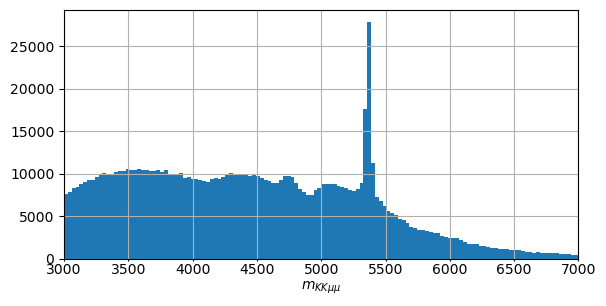

In [16]:
plt.figure(figsize=(6, 3))
Bs_mass_range = (3000, 7000)
plt.hist(data_frame['Bs_M'], bins='auto', range=Bs_mass_range)

plt.xlabel('$m_{KK \mu \mu}$')
plt.xlim(Bs_mass_range)
#plt.legend()
plt.tight_layout(pad=0.5)

plt.show()

Let's add the $\chi^2$ divided by the DoF as a column of the data frame, since it gives us a good measure of the quality of the vertex

In [17]:
def chi2_dof(data_frame):
    chi2 = data_frame.loc[:, Bs_IPCHI2_OWNPV]
    dof = Bs_IPCHI2_OWNPV
    direct= _bs_flight.divide((_bs_flight ** 2).sum(axis=1) ** 0.5, axis=0)

    data_frame['chi2_dof'] = np.arccos(np.clip(dot_prod, -1.0, 1.0))
    return data_frame

## Background reduction
The background was reduced in several ways: 
1. There were some inconsistencies in the data (structures at low values of momentum or PID), which were removed
2. Some known cuts were present in the data and were removed
3. Properties of events were optimised with a boosted decision tree.

## Cleaning cuts

### Momentum inconsistencies

We could see inconsistencies in the momentum distributions of the muons, as outlined below.
The cuts used are as follows:
* events with `mu_minus_PT` $<1.5$GeV were removed
* events with `mu_plus_PT` $<1.5$GeV were removed


In [18]:
mu_minus_PT_threshold = 1.5e3
mu_plus_PT_threshold = 1.5e3
K_plus_PT_threshold=5.0e2
K_minus_PT_threshold=5.0e2

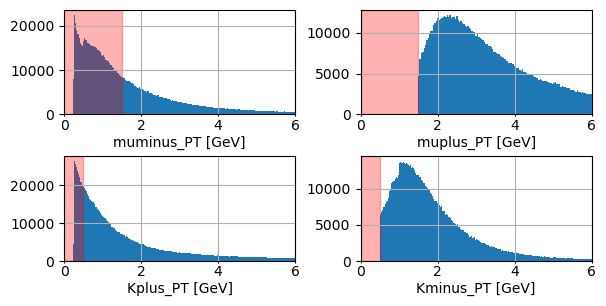

In [19]:
variables_to_plot = [
    ('muminus_PT', [0, 6000], mu_minus_PT_threshold),
    ('muplus_PT', [0, 6000], mu_plus_PT_threshold),
    ('Kplus_PT', [0, 6000], K_plus_PT_threshold),
    ('Kminus_PT', [0, 6000], K_minus_PT_threshold)
]

rows = int(np.ceil(len(variables_to_plot) / 2))
fig, axs = plt.subplots(rows, 2, figsize=(6, rows + 1))
axs = axs.flatten()
for i, (variable_name, range_, threshold) in enumerate(variables_to_plot):
    ax = axs[i]
    x_scale_factor = 1e3
    range_ = np.array(range_) / x_scale_factor
    ax.hist(data_frame.loc[:, variable_name] / x_scale_factor, bins='auto', range=range_)
    ax.axvspan(0, threshold / 1e3, color='r', alpha=0.3)
    ax.set_xlabel(variable_name + " [GeV]")
    ax.set_xlim(range_)

plt.tight_layout(pad=0.5)
plt.show()


### PID inconsistencies

PID inconsistencies were removed as follows:
* `K_plus_PIDK` $<5$ were removed
* `K_minus_PIDK` $<5$ were removed
* `mu_plus_PIDmu` $<3$ were removed
* `mu_minus_PIDmu` $<3$ were removed

mu_minus_PIDmu_threshold=3
mu_plus_PIDmu_threshold=3
K_minus_PIDK_threshold=5
K_plus_PIDK_threshold=5


variables_to_plot = [
    ('muminus_PIDmu_corr', [0, 15], mu_minus_PIDmu_threshold),
    ('muplus_PIDmu_corr', [0, 15], mu_plus_PIDmu_threshold),
    ('Kminus_PIDK_corr', [0, 120], K_minus_PIDK_threshold),
    ('Kplus_PIDK_corr', [0, 120], K_plus_PIDK_threshold)
]

rows = int(np.ceil(len(variables_to_plot) / 2))
fig, axs = plt.subplots(rows, 2, figsize=(6, rows + 1))
axs = axs.flatten()
for i, (variable_name, range_, threshold) in enumerate(variables_to_plot):
    ax = axs[i]
    range_ = np.array(range_)
    ax.hist(data_frame.loc[:, variable_name], bins='auto', range=range_)
    ax.axvspan(0, threshold, color='r', alpha=0.3)
    ax.set_xlabel(variable_name)
    ax.set_xlim(range_)

plt.tight_layout(pad=0.5)
plt.show()


In [20]:
def apply_inconsistencies_cuts(data_frame, apply_PID_cuts=False):
    data_frame = data_frame.loc[data_frame['muminus_PT'] > mu_minus_PT_threshold]
    data_frame = data_frame.loc[data_frame['muplus_PT'] > mu_plus_PT_threshold]
    data_frame = data_frame.loc[data_frame['Kminus_PT'] > K_minus_PT_threshold]
    data_frame = data_frame.loc[data_frame['Kplus_PT'] > K_plus_PT_threshold]
    if apply_PID_cuts:
        data_frame = data_frame.loc[data_frame['muminus_PIDmu'] > mu_minus_PIDmu_threshold]
        data_frame = data_frame.loc[data_frame['muplus_PIDmu'] > mu_plus_PIDmu_threshold]
        data_frame = data_frame.loc[data_frame['Kplus_PIDK'] > K_plus_PIDK_threshold]
        data_frame = data_frame.loc[data_frame['Kminus_PIDK'] > K_minus_PIDK_threshold]
    return data_frame

data_frame = apply_cuts('Inconsistencies', data_frame, apply_inconsistencies_cuts)


INFO:CuttingMonitor:Applying cuts: Inconsistencies
INFO:CuttingMonitor:	Initial length: 1050431
INFO:CuttingMonitor:	Length after cut: 363014 (34.559% kept)


Plot the $KK \mu \mu$ spectrum after these preliminary cuts:

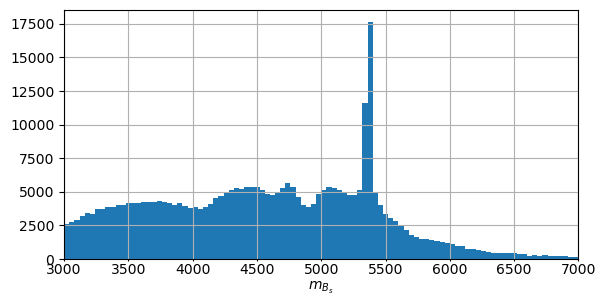

In [21]:
plt.figure(figsize=(6, 3))
Bs_mass_range = (3000, 7000)
plt.hist(data_frame['Bs_M'], bins='auto', range=Bs_mass_range)

plt.xlabel('$m_{B_s}$')
plt.xlim(Bs_mass_range)
#plt.legend()
plt.tight_layout(pad=0.5)

plt.show()

## Comparisons between background proxy and signal region

Attributes of the $J/\psi$ data were compared with attributes of the background.
Attributes consisted of
1. PID cuts
2. IP cuts
3. Isolation angle cuts
4. $\chi^2$ cuts

These have only been observed to look for evident cuts that we could do without a Boosted Decision Tree. In the end, we did not perform any cuts not to kill our signal further (SL stripping already harms us significantly)

### Defining control and background

The dimuon mass of the data frame was obtained with `get_mass`. 
Then the contol data was defined as data with a mass close to the $B_s$ mass and a dimuon mass close to the $J/\psi$ mass and dikaon mass in $\phi_3$ region. For our signal region we select $KK \mu \mu$ spectrum below 3.75 GeV, since neutrinos take away at least a $\tau$ mass from the original energy. We also select $KK$ region within $\phi_3$ and veto $J/\psi$ and $\psi(2s)$ region for dimuon spectrum.
A plot of the dimuon mass shows a clear peak at the $J/\psi$ resonance.


In [22]:
particles_associations_mu = [['muplus_P', 'mu'], ['muminus_P', 'mu']]
particles_associations_K = [['Kplus_P', 'K'], ['Kminus_P', 'K']]
data_frame['dimuon_mass'] = get_mass(data_frame=data_frame, particles_associations=particles_associations_mu)
data_frame['dikaon_mass'] = get_mass(data_frame=data_frame, particles_associations=particles_associations_K)

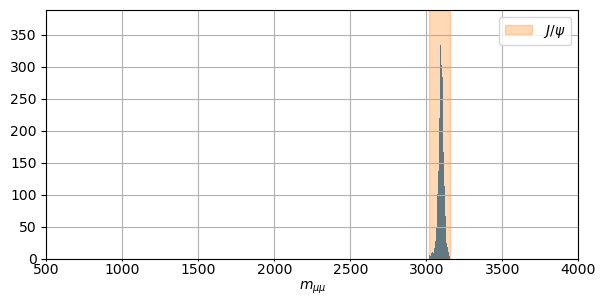

In [23]:
jpsi_peak_mask = (
    (data_frame['jpsi_M'] > 3020) & (data_frame['jpsi_M'] < 3155) & 
    (data_frame['Bs_M'] > 5200) & (data_frame['Bs_M'] < 5400) & (data_frame['phi3_M'] > 1600) & (data_frame['phi3_M'] < 1820)
)
background_selection = data_frame.loc[jpsi_peak_mask]

plt.figure(figsize=(6, 3))
dimuon_mass_range = (500, 4000)
plt.hist(background_selection['dimuon_mass'], bins='auto', range=dimuon_mass_range)

plt.axvspan(3020, 3155, label=r'$J/\psi$', color='C1',alpha=0.3)

plt.xlabel('$m_{\mu\mu}$')
plt.xlim(dimuon_mass_range)
plt.legend()
plt.tight_layout(pad=0.5)
plt.show()


'''
signal_region_mask = (
    ((data_frame['jpsi_M'] < 3020) | (data_frame['jpsi_M'] > 3155)) & ((data_frame['jpsi_M']<3536) | (data_frame['jpsi_M']>3873)) &
    (data_frame['Bs_M'] > 2500) & (data_frame['Bs_M'] < 3750) & (data_frame['phi_M'] > 1600) & (data_frame['phi_M'] < 1820)
)
'''

signal_region_mask = (
    ((data_frame['jpsi_M'] < 3020) | (data_frame['jpsi_M'] > 3155)) & ((data_frame['jpsi_M']<3536) | (data_frame['jpsi_M']>3873)) &
    (data_frame['Bs_M'] > 2500) & (data_frame['Bs_M'] < 3750) & (data_frame['phi3_M'] > 1600) & (data_frame['phi3_M'] < 1820)
)

signal_comparison = data_frame.loc[signal_region_mask]

In [24]:
def plot_compare_data(control_data, background_data, histogram_range, columns_to_plot, cut_regions=None, signal_name='signal', bins=50,lower_range=None):
    columns = len(columns_to_plot)
    fig, axs = plt.subplots(2, columns, figsize=(4 * columns, 4), sharex='col', squeeze=False)
    for i, column in enumerate(columns_to_plot):
        if lower_range==None:
            lower_range=0
        if isinstance(histogram_range, int) or isinstance(histogram_range, float):
            range_ = (lower_range, histogram_range)
        else:
            range_ = (0, histogram_range[i])

        if isinstance(column, str):
            _control_data = control_data[column]
            _background_data = background_data[column]
            _title = column
        else:
            _control_data = control_data[column[0]] - control_data[column[1]]
            _background_data = background_data[column[0]] - background_data[column[1]]
            _title = column[0] + ' $-$ ' + column[1]
        ax1, ax2 = axs[:, i]
        ax1.hist(_control_data, bins=bins, range=range_)
        ax2.hist(_background_data, bins=bins, range=range_)

        if cut_regions:
            cut_region = cut_regions[i]
            if cut_region[0] == '<':
                cut_range = (range_[0], cut_region[1])
            elif cut_region[0] == '>':
                cut_range = (cut_region[1], range_[1])
            else:
                raise ValueError(f"Unknown cut region indicator: {cut_region[0]}.")
            ax1.axvspan(*cut_range, color='r', alpha=0.3)
            ax2.axvspan(*cut_range, color='r', alpha=0.3)

        ax1.set_title(_title)
        ax1.set_xlim(range_)
        
        if i == 0:
            ax1.set_ylabel(signal_name)
            ax2.set_ylabel('Background')
        
    plt.tight_layout(pad=0.5)

### PID comparison

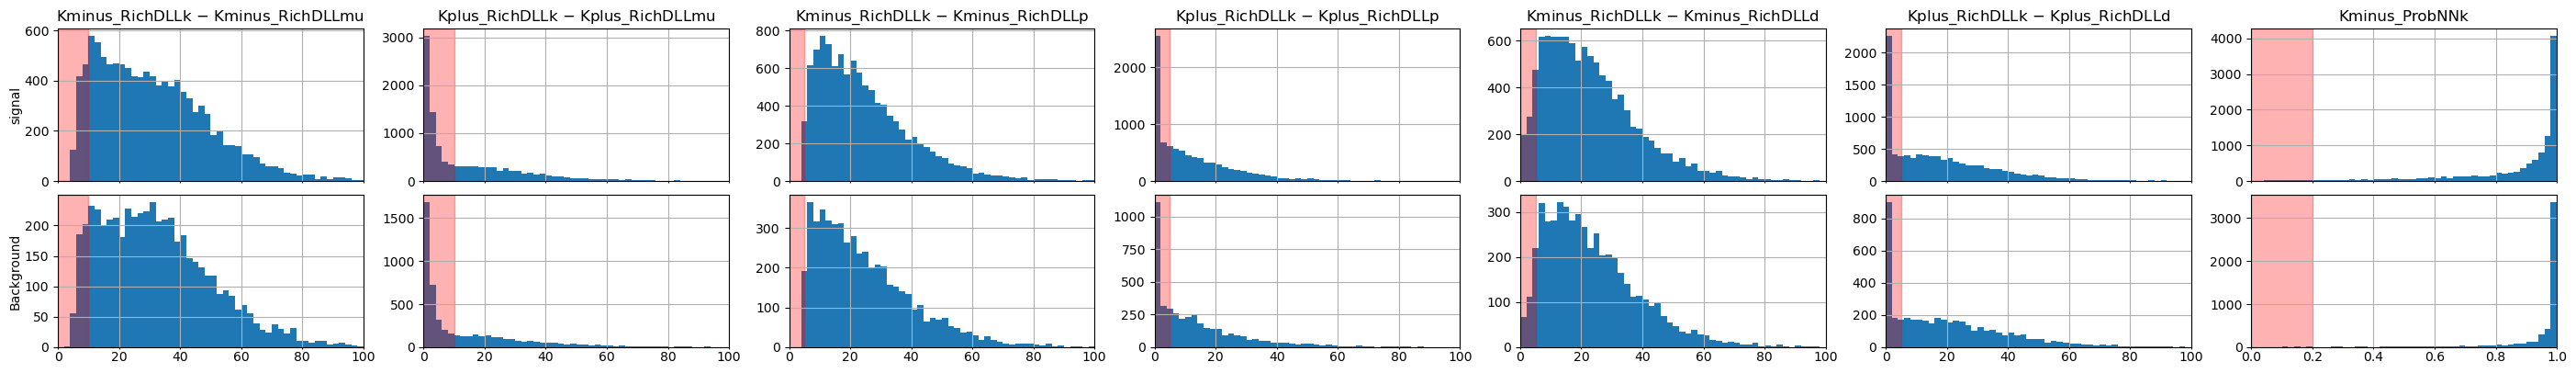

In [25]:
plot_compare_data(
    signal_comparison,
    background_selection, 
    histogram_range=[100,100,100,100,100,100,1],
    columns_to_plot=[
        ['Kminus_RichDLLk', 'Kminus_RichDLLmu'],
        ['Kplus_RichDLLk', 'Kplus_RichDLLmu'],
        ['Kminus_RichDLLk', 'Kminus_RichDLLp'],
        ['Kplus_RichDLLk', 'Kplus_RichDLLp'],
        ['Kminus_RichDLLk', 'Kminus_RichDLLd'],
        ['Kplus_RichDLLk', 'Kplus_RichDLLd'],
        'Kminus_ProbNNk'
    ], 
    cut_regions=[
        ('<', 10),
        ('<', 10),
        ('<', 5),
        ('<', 5),
        ('<', 5),
        ('<', 5),
        ('<', 0.2)
    ],
    signal_name='signal'
)


### IP comparisons

Comparing the impact parameter $\chi^2$ of the signal motivates

plot_compare_data(
    signal_comparison, background_selection, 
    histogram_range=100,
    columns_to_plot=[
        'muplus_IPCHI2_OWNPV', 
        'muminus_IPCHI2_OWNPV', 
        'Kplus_IPCHI2_OWNPV',
        'Kminus_IPCHI2_OWNPV',
        'Kminus_MINIPCHI2',
        'Kplus_MINIPCHI2',
        'muminus_MINIPCHI2',
        'muplus_MINIPCHI2',
    ], 
    cut_regions=[
      ('<', 36),
      ('<', 36),
      ('<', 36),
      ('<', 36),
      ('<', 36),
      ('<', 36),
      ('<', 36),
      ('<', 36)
    ],
    signal_name='signal'
)

### Isolation angle comparisons

The background and signal data have different isolation angle distributions.

plt.figure(figsize=(6, 3))
plt.hist(signal_comparison['Bs_pmu_ISOLATION_BDT1'], bins=50, density=True, label='Signal')
plt.hist(background_selection['Bs_pmu_ISOLATION_BDT1'], bins=50, density=True, alpha=0.7, label='Background')
xlim = plt.xlim()
plt.axvspan(0.15, xlim[1], color='r', alpha=0.2)
plt.xlabel('Isolation angle (Probability Distribution)')
plt.xlim(xlim)
plt.legend()
plt.show()


BDT1_threshold=-0.21

variables_to_plot = [
    ('Bs_pmu_ISOLATION_BDT1', BDT1_threshold),
]


### IP of $B_s$

We now look at the IP of the $B_s$ and try to use this to discriminate signal and background

Bs_IP_OWNPV_threshold=0.04
Bs_IPCHI2_OWNPV_threshold=0.32

plot_compare_data(
    signal_comparison, background_selection, 
    histogram_range=[0.2,9],
    columns_to_plot=[
        'Bs_IP_OWNPV', 
        'Bs_IPCHI2_OWNPV'
    ], 
    cut_regions=[
        ('>', Bs_IP_OWNPV_threshold),
        ('<', Bs_IPCHI2_OWNPV_threshold),
    ],
    signal_name='signal'
)

### DIRA comparison

DIRA_OWNPV_threshold=0.999985

plot_compare_data(
    signal_comparison, background_selection, 
    histogram_range=1,
    columns_to_plot=[
        'Bs_DIRA_OWNPV'
    ], 
    cut_regions=[
        ('<', DIRA_OWNPV_threshold)
    ],
    signal_name='signal',
    lower_range=0.9999
)

### Applying all comparisons cuts

Basically apart from the isolation angle, there is not much difference between signal and background. It's not worth it to apply any threshold cuts at the moment other than the inconsistencies shown at the beginning.

# Decay reconstruction

## Reloading the Data


### Cleaning the $B_s$ data using the cuts defined above.

In [26]:
from functools import partial

def ensure_is_muon(data_frame):
    if len(data_frame['muplus_IsMuon'].unique()) & len(data_frame['muminus_IsMuon'].unique()) == 1:
        return data_frame
    else:
        data_frame = data_frame.loc[data_frame['muplus_IsMuon']]
        data_frame = data_frame.loc[data_frame['muminus_IsMuon']]
        return data_frame

def reduce_background(data_frame):
    data_frame = apply_cuts('Inconsistencies', data_frame, apply_inconsistencies_cuts)
    #data_frame = apply_cuts('Known Decays', data_frame, apply_known_decay_cuts)
    #data_frame = apply_cuts('DIRA_L', data_frame, apply_DIRA_cuts_left)
    data_frame = apply_cuts('IsMuon', data_frame, ensure_is_muon)
    #data_frame = apply_cuts('IP', data_frame, apply_IP_cuts)
    #data_frame = apply_cuts('IPB_L', data_frame, apply_IPB_cuts_left)
    #data_frame = apply_cuts('PID_L', data_frame, apply_PID_cuts_left)

    return data_frame


In [27]:
Bs_reduced_data_frame = apply_cuts('Reduce Background', Bs_data.copy(), reduce_background)

INFO:CuttingMonitor:Applying cuts: Reduce Background
INFO:CuttingMonitor:	Initial length: 1092617
INFO:CuttingMonitor:Applying cuts: Inconsistencies
INFO:CuttingMonitor:	Initial length: 1092617
INFO:CuttingMonitor:	Length after cut: 372885 (34.128% kept)
INFO:CuttingMonitor:Applying cuts: IsMuon
INFO:CuttingMonitor:	Initial length: 372885
INFO:CuttingMonitor:	Length after cut: 372885 (100.000% kept)
INFO:CuttingMonitor:	Length after cut: 372885 (34.128% kept)


## Bs Line of Flight

Just extrapolating the $B_s$ LoF from the primary and secondary vertex

In [28]:
from numpy.linalg import solve,norm
from numpy.core.umath_tests import inner1d

_bs_flight_vars = ['_bs_dx', '_bs_dy', '_bs_dz']

# Find B_s flight distance. Should be already in the tuple, now that I think about it, so this might have been quite useless
def add_bs_flight(data_frame):
    bs_ownpv = data_frame.loc[:, ['Bs_RefPoint_X', 'Bs_RefPoint_Y', 'Bs_RefPoint_Z']] # primary vtx
    bs_end = data_frame.loc[:, ['Bs_VX', 'Bs_VY', 'Bs_VZ']] # secondary vtx
 
    bs_ownpv = bs_ownpv.rename(columns=rename_func)
    bs_end = bs_end.rename(columns=rename_func)

    data_frame[_bs_flight_vars] = bs_end - bs_ownpv
    
    bs_end=bs_end.to_numpy()
    bs_ownpv=bs_ownpv.to_numpy()
    
    diff=bs_end - bs_ownpv
    
    mag=np.sum(np.abs(diff)**2,axis=-1)**(1./2)

    data_frame['_bs_flight_dist'] = mag 
    
    return data_frame


<ipython-input-28-902515f2d56b>:2: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
_bs_dir_vars = ['_bs_dir_x', '_bs_dir_y', '_bs_dir_z']

# just normalizing the direction vector I found before

def add_bs_direction(data_frame):
    _bs_flight = data_frame.loc[:, _bs_flight_vars]
    
    direct= _bs_flight.divide((_bs_flight ** 2).sum(axis=1) ** 0.5, axis=0)
    data_frame[_bs_dir_vars] = direct
    
    # adding angle with z-axis in the tuple as well
    direct= direct.to_numpy()
    z_axis=np.zeros([len(direct[:,0]),3])
    ones=np.ones([len(direct[:,0]),1])
    z_axis[:,2]=ones[:,0]
    dot_prod=inner1d(z_axis,direct)
    data_frame['_bs_angle_z'] = np.arccos(np.clip(dot_prod, -1.0, 1.0))
    
    return data_frame


## Tau decay point


The tau decay point was obtained by 
1. Defining the line of flight of the $B$
2. Defining a line of flight for $\mu$. This line of flight is obtained from the $\mu$ reference point and from its momentum
3. Finding the closest distance of approach between the $\mu$ LoF and the $B$ LoF.

In [30]:
from numpy.core.umath_tests import inner1d

_tau_plus_dir_vars = ['_tau_plus_dir_x', '_tau_plus_dir_y', '_tau_plus_dir_z']

# here I have called it the "tau" direction what is really the muon direction. Very sloppy, aplogies.

def add_tau_plus_direction(data_frame):
    _tau_plus_mom = data_frame.loc[:, ['muplus_PX', 'muplus_PY', 'muplus_PZ']] # mom of muon at detector
    
    direct=_tau_plus_mom.divide((_tau_plus_mom ** 2).sum(axis=1) ** 0.5, axis=0) # normalize vector
    
    data_frame[_tau_plus_dir_vars] = direct # save the direction vector
    
    # now I evaluated the angle with z-direction. Probably I did it just to visualise stuff in debugging, can't remember. Still, might be useful
    direct= direct.to_numpy()
    z_axis=np.zeros([len(direct[:,0]),3])
    ones=np.ones([len(direct[:,0]),1])
    z_axis[:,2]=ones[:,0]
    dot_prod=inner1d(z_axis,direct)
    data_frame['_mu_plus_angle_z'] = np.arccos(np.clip(dot_prod, -1.0, 1.0))
    
    return data_frame


_tau_minus_dir_vars = ['_tau_minus_dir_x', '_tau_minus_dir_y', '_tau_minus_dir_z']

# same as for +

def add_tau_minus_direction(data_frame):
    _tau_minus_mom = data_frame.loc[:, ['muminus_PX', 'muminus_PY', 'muminus_PZ']]
    direct=_tau_minus_mom.divide((_tau_minus_mom ** 2).sum(axis=1) ** 0.5, axis=0)
    data_frame[_tau_minus_dir_vars] = direct
    direct= direct.to_numpy()
    z_axis=np.zeros([len(direct[:,0]),3])
    ones=np.ones([len(direct[:,0]),1])
    z_axis[:,2]=ones[:,0]
    dot_prod=inner1d(z_axis,direct)
    data_frame['_mu_minus_angle_z'] = np.arccos(np.clip(dot_prod, -1.0, 1.0))
    return data_frame


# evaluated the angles between the MUONS (again, sorry) because it could be an extra discriminant between signal and background

def add_tau_angle(data_frame):
    _tau_minus_dir=data_frame.loc[:,_tau_minus_dir_vars].to_numpy()
    _tau_plus_dir=data_frame.loc[:,_tau_plus_dir_vars].to_numpy()
    
    angle=np.arccos(inner1d(_tau_minus_dir,_tau_plus_dir))
    
    data_frame['_taus_angle'] = angle
    
    return data_frame
    

In [31]:
from numpy.linalg import solve,norm
from numpy.core.umath_tests import inner1d


_tau_plus_closest_dist = ['_tau_plus_closest_dist']
_tau_plus_closest_vars = ['_tau_plus_closest_x', '_tau_plus_closest_y', '_tau_plus_closest_z']

# now, this is quite inefficient, but it works
# it finds the closest distance of approach between Bs LoF and mu LoF for the MUONS (for the third time, sorry)
# also, I find the IP between phi vertex and muons LoF

def add_closest_approach_plus(data_frame):
    _bs_dir=data_frame.loc[:, _bs_dir_vars].to_numpy()
    _tau_plus_dir=data_frame.loc[:,_tau_plus_dir_vars].to_numpy()
    
    p0=data_frame.loc[:, ['phi3_VX', 'phi3_VY', 'phi3_VZ']].to_numpy()
    p1=data_frame.loc[:, ['muplus_RefPoint_X', 'muplus_RefPoint_Y', 'muplus_RefPoint_Z']].to_numpy()
    own=data_frame.loc[:, ['Bs_RefPoint_X', 'Bs_RefPoint_Y', 'Bs_RefPoint_Z']].to_numpy()
    
    a=np.cross(_tau_plus_dir,_bs_dir)
    a=(a.T/norm(a, axis = 1)).T
    c=p1-p0
    
    data_frame['_tau_plus_closest_dist'] = abs(inner1d(a,c)) # CDA that we are interested in
    
    coords=np.zeros([len(p1[:,0]),3])

    ownpv_dist=np.zeros([len(p1[:,0]),1])
    
    phi_IP=np.zeros([len(p1[:,0]),1])
    
    for i in range(len(p1[:,0])):

        rhs=p1[i,:]-p0[i,:]
        lhs=np.array([_bs_dir[i,:],-_tau_plus_dir[i,:],a[i,:]]).T
        X=solve(lhs,rhs)
    
        coords[i,:]=p0[i,:]+X[0]*_bs_dir[i,:]
        
        own_p1=p1[i,:]-own[i,:]
        ownpv_dist[i]=norm(np.cross(own_p1,_tau_plus_dir[i,:]))
        
        phi_detect=p0[i,:]-p1[i,:]
        phi_IP[i]=norm(np.cross(phi_detect,_tau_plus_dir[i,:]))
    
    data_frame['_tau_plus_closest_x'] = coords[:,0]
    data_frame['_tau_plus_closest_y'] = coords[:,1]
    data_frame['_tau_plus_closest_z'] = coords[:,2]

    
    data_frame['_tau_plus_closest_dist_own'] = ownpv_dist
    
    data_frame['_tau_plus_phi_IP'] = phi_IP

    
    
    return data_frame
   
    
_tau_minus_closest_dist = ['_tau_minus_closest_dist']
_tau_minus_closest_vars = ['_tau_minus_closest_x', '_tau_minus_closest_y', '_tau_minus_closest_z']

def add_closest_approach_minus(data_frame):
    _bs_dir=data_frame.loc[:, _bs_dir_vars].to_numpy()
    _tau_minus_dir=data_frame.loc[:,_tau_minus_dir_vars].to_numpy()
    
    p0=data_frame.loc[:, ['phi3_VX', 'phi3_VY', 'phi3_VZ']].to_numpy()
    p1=data_frame.loc[:, ['muminus_RefPoint_X', 'muminus_RefPoint_Y', 'muminus_RefPoint_Z']].to_numpy()
    own=data_frame.loc[:, ['Bs_RefPoint_X', 'Bs_RefPoint_Y', 'Bs_RefPoint_Z']].to_numpy()
    
    a=np.cross(_tau_minus_dir,_bs_dir)
    a=(a.T/norm(a, axis = 1)).T
    c=p1-p0
    
    data_frame['_tau_minus_closest_dist'] = abs(inner1d(a,c)) 
    coords=[]
    
    coords=np.zeros([len(p1[:,0]),3])

    ownpv_dist=np.zeros([len(p1[:,0]),1])
    
    phi_IP=np.zeros([len(p1[:,0]),1])
    
    for i in range(len(p1[:,0])):

        rhs=p1[i,:]-p0[i,:]
        lhs=np.array([_bs_dir[i,:],-_tau_minus_dir[i,:],a[i,:]]).T
        X=solve(lhs,rhs)
    
        coords[i,:]=p0[i,:]+X[0]*_bs_dir[i,:] # point on Bs LoF where we have the CDA. Basically the reconstructed decay vertex of the tau
        
        own_p1=p1[i,:]-own[i,:]
        ownpv_dist[i]=norm(np.cross(own_p1,_tau_minus_dir[i,:])) # IP with OWNPV of Bs (I think... not useful anyway)
        
        phi_detect=p0[i,:]-p1[i,:]
        phi_IP[i]=norm(np.cross(phi_detect,_tau_minus_dir[i,:])) # IP with phi vertex
        
        
        
    
    data_frame['_tau_minus_closest_x'] = coords[:,0]
    data_frame['_tau_minus_closest_y'] = coords[:,1]
    data_frame['_tau_minus_closest_z'] = coords[:,2]

    data_frame['_tau_minus_closest_dist_own'] = ownpv_dist 
    
    data_frame['_tau_minus_phi_IP'] = phi_IP
    
    
    return data_frame
   
    
    
_tau_plus_closest_dist = ['_tau_plus_closest_dist']
_tau_plus_closest_vars = ['_tau_plus_closest_x', '_tau_plus_closest_y', '_tau_plus_closest_z']

Now find the Flight Distance of the (this time yes) $\tau$

In [32]:
def add_dist_travelled_plus(data_frame):
    _tau_origin = data_frame.loc[:, ['phi3_VX', 'phi3_VY', 'phi3_VZ']].to_numpy()
    _tau_end = data_frame.loc[:, _tau_plus_closest_vars].to_numpy()
    _tau_origin_own = data_frame.loc[:, ['Bs_RefPoint_X', 'Bs_RefPoint_Y', 'Bs_RefPoint_Z']].to_numpy()
    
    _bs_dir =  data_frame.loc[:,_bs_dir_vars].to_numpy()
    
    diff=_tau_end -_tau_origin

    sign=inner1d(_bs_dir,diff)/abs(inner1d(_bs_dir,diff))
    
    mag=np.sum(np.abs(diff)**2,axis=-1)**(1./2)
    
    data_frame['_tau_plus_flight_dist'] = mag * sign # added the sign!!! Important if want to knwo which way the tau went basically
    
    cda = data_frame.loc[:,'_tau_plus_closest_dist'].to_numpy()
    data_frame['_tau_plus_angle_b']=np.arctan(cda/mag) # angle between tau if it decayed on muon LoF (instead of B LoF) and B LoF. Not really important, never used in the analysis
    
    diff_own=_tau_end -_tau_origin_own

    sign=inner1d(_bs_dir,diff_own)/abs(inner1d(_bs_dir,diff_own))
    
    mag_own=np.sum(np.abs(diff_own)**2,axis=-1)**(1./2)
    
    data_frame['_tau_plus_flight_dist_own'] = mag_own * sign # as if coming from OWNPV. Again, never used this reconstructed variable. Don't even remember why I did this, does not make much sense

    return data_frame


# same comments as for +
def add_dist_travelled_minus(data_frame):
    _tau_origin = data_frame.loc[:, ['phi3_VX', 'phi3_VY', 'phi3_VZ']].to_numpy()
    _tau_end = data_frame.loc[:, _tau_minus_closest_vars].to_numpy()
    _tau_origin_own = data_frame.loc[:, ['Bs_RefPoint_X', 'Bs_RefPoint_Y', 'Bs_RefPoint_Z']].to_numpy()
    
    _bs_dir =  data_frame.loc[:,_bs_dir_vars].to_numpy()
    
    diff=_tau_end -_tau_origin

    sign=inner1d(_bs_dir,diff)/abs(inner1d(_bs_dir,diff))
    
    mag=np.sum(np.abs(diff)**2,axis=-1)**(1./2)

    data_frame['_tau_minus_flight_dist'] = mag * sign
    
    cda = data_frame.loc[:,'_tau_minus_closest_dist'].to_numpy()
    data_frame['_tau_minus_angle_b']=np.arctan(cda/mag)
    
    diff_own=_tau_end -_tau_origin_own

    sign=inner1d(_bs_dir,diff_own)/abs(inner1d(_bs_dir,diff_own))
    
    mag_own=np.sum(np.abs(diff_own)**2,axis=-1)**(1./2)
    
    data_frame['_tau_minus_flight_dist_own'] = mag_own * sign

    
    return data_frame

In [33]:
_phi_dir_vars = ['_phi_dir_x', '_phi_dir_y', '_phi_dir_z']

# found the phi dirtection just by normalizing the already reconstructed phi mom
def add_phi_direction(data_frame):
    
    direct=data_frame.loc[:, ['phi3_PX', 'phi3_PY', 'phi3_PZ']]
    direct_norm=direct.divide((direct** 2).sum(axis=1) ** 0.5, axis='rows')

    data_frame[_phi_dir_vars] =direct_norm
    return data_frame


### Reconstructing mass in $B_s$ rest frame
To reconstruct the mass in the $B_s$ rest frame:
1. Find $\beta$ such that $K$ are back to back
2. Boost to that frame
3. Add two tau masses
We later realised we don't discriminate between signal and background by doing this (as long as the two kaons come from a $\phi_3$), so we did not use this later in the analysis. The way I wrote this is also quite inefficient, so unless you find a reason why this could be useful, comment out the relative line in the reconstruction. I'll leave the reconstruction code here though, you never know.

In [34]:
from scipy.optimize import newton_krylov

_K_plus_boosted_P = ['_K_plus_boosted_PX', '_K_plus_boosted_PY', '_K_plus_boosted_PZ']
_K_minus_boosted_P = ['_K_minus_boosted_PX', '_K_minus_boosted_PY', '_K_minus_boosted_PZ']


def gamma(beta): # gamma factor
    gamma=1/np.sqrt(1-beta**2)
    return gamma

def boost_find(p_par_prime_plus,p_T_plus,p_par_prime_minus,p_T_minus,_K_plus_E,_K_minus_E):
    
    def funct(beta): # equation we need to solve to find beta
            p_com_plus=(gamma(beta)*(p_par_prime_plus-beta*_K_plus_E))
            p_com_minus=(gamma(beta)*(p_par_prime_minus-beta*_K_minus_E))
            f=p_com_plus**2-p_com_minus**2+p_T_plus**2-p_T_minus**2
            #f=p_com_plus-p_com_minus
            return f 
    
    beta_root=newton_krylov(funct,0.998) # basically looking for the solution using Newton method
    return beta_root
        
# basically reconstructing the mass as explained above        
def add_back_to_back(data_frame):
    _K_plus_momentum = data_frame.loc[:,['Kplus_PX','Kplus_PY','Kplus_PZ']].to_numpy()
    _K_minus_momentum = data_frame.loc[:,['Kminus_PX','Kminus_PY','Kminus_PZ']].to_numpy()
    _phi_dir=data_frame.loc[:, _phi_dir_vars].to_numpy()
    
    _K_plus_par=inner1d(_K_plus_momentum,_phi_dir)
    
    _K_plus_P_T_mag=np.sqrt(inner1d(_K_plus_momentum,_K_plus_momentum)-_K_plus_par**2)
    _K_minus_par=inner1d(_K_minus_momentum,_phi_dir)
    _K_minus_P_T_mag=np.sqrt(inner1d(_K_minus_momentum,_K_minus_momentum)-_K_minus_par**2)
    
    _K_plus_P_T=_K_plus_momentum-(_phi_dir.T * _K_plus_par).T
    _K_minus_P_T=_K_minus_momentum-(_phi_dir.T * _K_minus_par).T
    
    _K_plus_E=np.sqrt(493.7**2+inner1d(_K_plus_momentum,_K_plus_momentum))
    _K_minus_E=np.sqrt(493.7**2+inner1d(_K_minus_momentum,_K_minus_momentum))
    _betas=[]
    _p_com_plus=[]
    _p_com_minus=[]
    _found_beta=[] # boolean vector with info whether reconstruction was possible or not
    
    _E_com_plus=[]
    _E_com_minus=[]
    
    for i in range(len(_K_minus_E)):
    #for i in range(100):
        p_par_prime_plus=_K_plus_par[i]
        p_T_plus=_K_plus_P_T_mag[i]
        p_par_prime_minus=_K_minus_par[i]
        p_T_minus=_K_minus_P_T_mag[i]
        
        try:
            _beta_boost=boost_find(p_par_prime_plus,p_T_plus,p_par_prime_minus,p_T_minus,_K_plus_E[i],_K_minus_E[i])
            _found_beta.append(True)
        except:
            _beta_boost=0
            _found_beta.append(False) # so that if we want later we can use boolean logic to filter out events where doing the reconstruction was not useful
        
        _betas.append(_beta_boost)
        
        _p_com_plus_i=(gamma(_beta_boost)*(p_par_prime_plus-_beta_boost*_K_plus_E[i]))
        _p_com_minus_i=(gamma(_beta_boost)*(p_par_prime_minus-_beta_boost*_K_minus_E[i]))
        
        _E_com_plus_i=(gamma(_beta_boost)*(-_beta_boost*p_par_prime_plus+_K_plus_E[i]))
        _E_com_minus_i=(gamma(_beta_boost)*(-_beta_boost*p_par_prime_minus+_K_minus_E[i]))
        
        _p_com_plus.append(_p_com_plus_i)
        _p_com_minus.append(_p_com_minus_i)
        
        _E_com_plus.append(_E_com_plus_i)
        _E_com_minus.append(_E_com_minus_i)
        
        #print(_E_com_plus_i)
        
        #print(_p_com_plus_i,_p_com_minus_i)
        
        if i%100==0:
            print(i)

    _p_com_plus=np.asarray(_p_com_plus)
    _p_com_minus=np.asarray(_p_com_minus)
    #print(_p_com_plus)
    
    _K_plus_boosted_P=_K_plus_P_T+(_phi_dir.T * _p_com_plus).T
    _K_minus_boosted_P=_K_minus_P_T+(_phi_dir.T * _p_com_minus).T
        
    angle=np.arccos(inner1d(_K_plus_boosted_P,_K_minus_boosted_P)/(np.sqrt(inner1d(_K_plus_boosted_P,_K_plus_boosted_P))*np.sqrt(inner1d(_K_minus_boosted_P,_K_minus_boosted_P))))
    
    
    # save all the reconstructed variables
    data_frame.loc[:,"_beta_back_to_back"]=_betas
    

    data_frame.loc[:,"_K_plus_lab_PT"]=_K_plus_P_T_mag
    data_frame.loc[:,"_K_minus_lab_PT"]=_K_minus_P_T_mag
    
    data_frame.loc[:,"_K_plus_lab_par"]=_K_plus_par
    data_frame.loc[:,"_K_minus_lab_par"]=_K_minus_par
    
    data_frame.loc[:,"_K_plus_com_PE"]=_p_com_plus
    data_frame.loc[:,"_K_minus_com_PE"]=_p_com_minus
    
    data_frame.loc[:,"_K_plus_com_PE"]=_p_com_plus
    data_frame.loc[:,"_K_minus_com_PE"]=_p_com_minus
    
    data_frame.loc[:,"_K_plus_com_E"]=_E_com_plus
    data_frame.loc[:,"_K_minus_com_E"]=_E_com_minus
    
    data_frame.loc[:,'_K_plus_boosted_PX'] = _K_plus_boosted_P[:,0]
    data_frame.loc[:,'_K_plus_boosted_PY'] = _K_plus_boosted_P[:,1]
    data_frame.loc[:,'_K_plus_boosted_PZ'] = _K_plus_boosted_P[:,2]
    
    data_frame.loc[:,'_K_minus_boosted_PX'] = _K_minus_boosted_P[:,0]
    data_frame.loc[:,'_K_minus_boosted_PY'] = _K_minus_boosted_P[:,1]
    data_frame.loc[:,'_K_minus_boosted_PZ'] = _K_minus_boosted_P[:,2]
    
    data_frame.loc[:,'_K_boosted_angle'] = angle 
    data_frame.loc[:,'_found_beta'] = _found_beta 
    
    return data_frame
    

# find CoM energy of the system
def add_com_E(data_frame):
    _K_plus_mom=data_frame.loc[:,_K_plus_boosted_P].to_numpy()
    _K_minus_mom=data_frame.loc[:,_K_plus_boosted_P].to_numpy()
    _K_plus_E=data_frame.loc[:,"_K_plus_com_E"]
    _K_minus_E=data_frame.loc[:,"_K_minus_com_E"]
    
    _tau_plus_E=1776.86
    _tau_minus_E=1776.86
    
    #print(_K_plus_E+_K_minus_E)
    
    _p_tot=_K_plus_mom+_K_minus_mom
    
    _E_tot=_tau_plus_E+_tau_minus_E+_K_plus_E+_K_minus_E
    
    _E_com=_E_tot**2-inner1d(_p_tot,_p_tot)
    
    data_frame.loc[:,'_E_com_reco'] =np.sqrt(_E_com) 
    
    return data_frame

### Duplicate removal
Had some issues with the tuple regarding the fact that the same event was repeated 4, 8 sometimes 16 times. The function below fix are to fix this

In [35]:
# adds to the tuple how many times whe have that event in the above rows
def add_event_occurrence(data_frame):
    event_number=data_frame.loc[:,"eventNumber"].to_numpy()
    
    event_occurence=np.zeros(len(event_number))
    
    occurrence=0
    for i in range(len(event_number)):
        if event_number[i]==event_number[i-1]:
            occurrence+=1
            event_occurence[i]=occurrence
        else:
            occurrence=0
            event_occurence[i]=occurrence
            
    #print(event_occurence)
    data_frame.loc[:,'event_occurrence'] = event_occurence
    
    return data_frame
    

def remove_duplicates(data_frame):    
    return data_frame.loc[data_frame['event_occurrence']==0]



# trying to do the same as above, but instead of looking at the event number I also look at PZ of a kaon to check that they are actual clones, and not just events with the same event number
def find_clones(data_frame):
    precision=0.001
    _k_plus_mom=data_frame.loc[:,"Kplus_PZ"].to_numpy()
    event_number=data_frame.loc[:,"eventNumber"].to_numpy()
    
    #data_frame.loc[:,'mother_clone'] = np.zeros(len(_k_plus_mom))
    mother_clone=np.zeros(len(_k_plus_mom))
    
    event_list=[]
    for i in event_number:
        if i not in event_list:
            event_list.append(i)
    
    for i in event_list:
        #index=data_frame.loc[data_frame['eventNumber']==i].index
        index=np.argwhere(event_number==i)
        #print(index[-1])
        mom_mother=_k_plus_mom[index[0]]

        if len(index)>1:
            for j in index[1:]:
                mom=_k_plus_mom[j]
                if ((mom > (mom_mother-mom_mother*precision)) & (mom < (mom_mother+mom_mother*precision))):
                    #print("hi")
                    #data_frame['mother_clone'][j:j]=1
                    mother_clone[j]=1
                
        data_frame.loc[:,'mother_clone'] = mother_clone
            
    return data_frame

# kills all the clones
def remove_clones(data_frame):
    return data_frame.loc[data_frame['mother_clone']==0]

## Reconstruction as a Function

Reconstruct all of the variables with the functions defined above. It will take a while

In [36]:
def add_tau_reconstruction(data_frame):
    data_frame = add_bs_flight(data_frame)
    data_frame = add_bs_direction(data_frame)
    data_frame = add_tau_plus_direction(data_frame)
    data_frame = add_tau_minus_direction(data_frame)
    data_frame = add_closest_approach_minus(data_frame)
    data_frame = add_closest_approach_plus(data_frame)
    data_frame = add_dist_travelled_minus(data_frame)
    data_frame = add_dist_travelled_plus(data_frame)
    data_frame = add_tau_angle(data_frame)
    data_frame = add_phi_direction(data_frame)
    data_frame = add_event_occurrence(data_frame)
    data_frame = find_clones(data_frame)
    #data_frame = add_back_to_back(data_frame)
    #data_frame = add_com_E(data_frame)

    return data_frame

In [ ]:
Bs_reduced_tau_reconstructed_data_frame = add_tau_reconstruction(Bs_reduced_data_frame)

<ipython-input-30-0eb50af8d895>:48: RuntimeWarning: invalid value encountered in arccos
  angle=np.arccos(inner1d(_tau_minus_dir,_tau_plus_dir))


## Kill the Clones
Let's have a closer look at the clones problem

In [ ]:
plt.figure()
plt.hist(Bs_reduced_tau_reconstructed_data_frame['event_occurrence'],bins=11,range=[0,10])
plt.hist(Bs_reduced_tau_reconstructed_data_frame.loc[Bs_reduced_tau_reconstructed_data_frame['mother_clone']==0]['event_occurrence'],bins=11,range=[0,10],alpha=0.7)
plt.show()

What the above plot tells us is that basically all the events that have event occurence other than 0 are clones! So we can cut them away safely. Let's visualise what killing the clones actually would mean for our data set.

In [ ]:
phi3mask=((Bs_reduced_tau_reconstructed_data_frame['phi3_M']>1600) & (Bs_reduced_tau_reconstructed_data_frame['phi3_M']<1850))

plt.figure(figsize=(6, 3))
Bs_mass_range = (0, 7200)
plt.hist(Bs_reduced_tau_reconstructed_data_frame.loc[phi3mask]['Bs_M'], bins=100, range=Bs_mass_range)
plt.hist(Bs_reduced_tau_reconstructed_data_frame.loc[phi3mask].loc[Bs_reduced_tau_reconstructed_data_frame['mother_clone']==0]['Bs_M'], bins=100, range=Bs_mass_range,alpha=0.7)
plt.xlabel('$m_{KK\mu\mu}$')
plt.xlim(Bs_mass_range)
plt.tight_layout(pad=0.5)

# Let's remove them
Bs_reduced_tau_reconstructed_data_frame=remove_clones(Bs_reduced_tau_reconstructed_data_frame) 

## Checks

### Reconstructed variables

Let's check how the CDA and flight distance distribution differ between signal region and background proxies (phi3 jpsi and combinatorial)

In [ ]:
jpsi_phi3_mask = (
    (Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] > 3020) & (Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] < 3150) &
    (Bs_reduced_tau_reconstructed_data_frame['phi3_M'] > 1600) & (Bs_reduced_tau_reconstructed_data_frame['phi3_M'] < 1820)
)

signal_mask = (
    ((Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] < 3020) | (Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] > 3150)) &
    ((Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] < 3536) | (Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] > 3873)) &
    (Bs_reduced_tau_reconstructed_data_frame['phi3_M'] > 1600) & (Bs_reduced_tau_reconstructed_data_frame['phi3_M'] < 1820) & 
    (Bs_reduced_tau_reconstructed_data_frame['Bs_M'] > 2500) & (Bs_reduced_tau_reconstructed_data_frame['Bs_M'] <3750) 
)


sideband = ((Bs_reduced_tau_reconstructed_data_frame['Bs_M']>5450) & ((Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] < 3020) | (Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] > 3150)) &
            ((Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] < 3536) | (Bs_reduced_tau_reconstructed_data_frame['jpsi_M'] > 3873)) 
)


combinatorial=Bs_reduced_tau_reconstructed_data_frame.loc[sideband]
jpsi_phi3=Bs_reduced_tau_reconstructed_data_frame.loc[jpsi_phi3_mask]
signal=Bs_reduced_tau_reconstructed_data_frame.loc[signal_mask]

bins=100
range_=[0,0.001]

fig, axs = plt.subplots(3, 3, figsize=(12,12), sharex='col', squeeze=False)
ax1, ax2,ax3 = axs[:, 1]
ax1.hist(signal['_tau_minus_closest_dist'], bins=bins, range=range_)
ax2.hist(jpsi_phi3['_tau_minus_closest_dist'], bins=bins, range=range_)
ax3.hist(combinatorial['_tau_minus_closest_dist'], bins=bins, range=range_)

ax1.set_xlim(range_)
ax3.set_xlabel('mm')
ax1.set_title("CDA")

range_=[2000,6000]

ax1, ax2,ax3 = axs[:, 0]

ax1.set_ylabel('Signal')
ax2.set_ylabel('Jpsi_phi3')
ax3.set_ylabel('Combinatorial')

ax1.set_title("Mass Plot")
ax1.hist(signal['Bs_M'], bins=bins, range=range_)
ax2.hist(jpsi_phi3['Bs_M'], bins=bins, range=range_)
ax3.hist(combinatorial['Bs_M'], bins=bins, range=range_)

ax3.set_xlabel('MeV/c^2')


range_=[-50,50]
ax1, ax2,ax3 = axs[:, 2]
ax1.set_title("Flight Distance")
ax1.hist(signal['_tau_minus_flight_dist'], bins=bins, range=range_)
ax2.hist(jpsi_phi3['_tau_minus_flight_dist'], bins=bins, range=range_)
ax3.hist(combinatorial['_tau_minus_flight_dist'], bins=bins, range=range_)

ax3.set_xlabel('mm')


plt.tight_layout(pad=0.5)

### $B$ Line of Flight and Angle with $z$ Axis

Look at the $B$ flight distance, which we expect to be roughly 8mm

In [ ]:
plt.figure()
plt.hist(jpsi_phi3['_bs_flight_dist'],bins=100,range=[-10,100])
plt.hist(signal['_bs_flight_dist'],bins=100,range=[-10,100], alpha=0.7)
plt.show()

Now look at the $B$ and $\mu$ angles with the $z$ axis

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16,4), sharex='col', squeeze=False)
ax1,ax2,ax3= axs[0,:]
ax1.set_title('_bs_angle_z')
ax2.set_title('_mu_plus_angle_z')
ax3.set_title('_mu_minus_angle_z')
ax1.hist(signal['_bs_angle_z'],bins=100,range=[0,3.14])
ax2.hist(signal['_mu_plus_angle_z'],bins=100,range=[0,3.14])
ax3.hist(signal['_mu_minus_angle_z'],bins=100,range=[0,3.14])
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(16,4), sharex='col', squeeze=False)
ax1,ax2= axs[0,:]
ax1.set_title('_tau_plus_angle_b')
ax2.set_title('_tau_minus_angle_b')
ax1.hist(signal['_tau_plus_angle_b'],bins=100,range=[0,0.002])
ax2.hist(signal['_tau_minus_angle_b'],bins=100,range=[0,0.002])
plt.show()

Look at the angle distribution between the muons

In [ ]:
plt.figure()
plt.hist(signal['_taus_angle'],bins=100)
plt.show()

Look at distribution of IP with phi vertex

In [ ]:
plt.figure()
plt.hist(jpsi_phi3['_tau_minus_phi_IP'],bins=100,range=[0,3])
plt.hist(signal['_tau_minus_phi_IP'],bins=100,range=[0,3],alpha=0.7)
plt.show()

## Output saving

In [ ]:
BDT_COLUMNS = ['mu_plus_PT', 'mu_minus_PT', 'mu_plus_P', 'mu_minus_P','_tau_minus_closest_dist',
    '_tau_plus_closest_dist','_tau_minus_flight_dist','_tau_plus_flight_dist','K_minus_PIDK','K_plus_PIDK','phi_ORIVX_CHI2','_tau_minus_phi_IP','_tau_plus_phi_IP']

def save_data_frame(data_frame: pd.DataFrame, filename: str, for_BDT_only=False):
    if for_BDT_only:
        for column in BDT_COLUMNS:
            if column not in data_frame.columns:
                raise ValueError(f"Column {column} not found in DataFrame.")
        saved_data = data_frame.loc[:, BDT_COLUMNS]
    else:
        saved_data = data_frame
    print(f"Saving DataFrame (shape: {saved_data.shape}) to: {filename}.")
    saved_data.to_pickle(filename)


In [ ]:
# for DATA ###
Bs_reduced_tau_reconstructed_data_frame.to_pickle('Bs_reduced_tau_reconstructed_data_frame_SL.pkl.gz')
print(f"Saved DataFrame (shape: {Bs_reduced_tau_reconstructed_data_frame.shape}).")


# for phi3 tau tau MC ###
Bs_reduced_tau_reconstructed_data_frame.to_pickle('Bs_reduced_tau_reconstructed_data_frame_MC.pkl.gz')
print(f"Saved DataFrame (shape: {Bs_reduced_tau_reconstructed_data_frame.shape}).")

# for phi mu mu MC ###
Bs_reduced_tau_reconstructed_data_frame.to_pickle('Bs_reduced_tau_reconstructed_data_frame_MC_phimumu.pkl.gz')
print(f"Saved DataFrame (shape: {Bs_reduced_tau_reconstructed_data_frame.shape}).")

In [ ]:
len(Bs_data)

In [ ]:
plt.figure()
plt.hist(signal['FD_tau_minus'],bins=100, range=[0,100], alpha=0.3)
plt.hist(signal['_tau_minus_closest_dist'],bins=100, range=[0,100], alpha=0.3)
plt.show()